# Data Science to Explore Your Own Genome
## DNA analysis with pandas and Selenium

In [1]:
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
sns.color_palette('Spectral')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import requests
import pandas as pd

import re

In [3]:
!pip install selenium

In [4]:
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait

## Importing my DNA into pandas and exploring the genome

Looking at the .txt file, I could see that I was missing some genotype values, which were denoted with '--'. 

While most of the chromosomes are ints, there is an X and a Y (which I may convert later to a number for analytic purposes), but for now I need to make sure to specify the data type properly so that pandas doesn't throw an error when it sees mixed data in the input. 

The other columns are fairly straightforward. I also want pandas to ignore the prefatory comments at the beginning of the file that consist of lines beginning with an octothorpe.

The arguments I need to pass are:
* separator (tab-delimited)
* dtype (as a dict)
* na_values ('--')
* comment ('#')

![img](/genome.png)

In [5]:
data = pd.read_csv('D:\data science projects dailys\web scraping\web scraping\DNA_scraping_analysis\genome.txt', sep='\t', dtype={'rsid':'str', 'chromosome':'object', 'position':'int', 'genotype':'str'}, comment='#')



In [6]:
print(data)

               rsid chromosome  position genotype
0       rs548049170          1     69869       TT
1        rs13328684          1     74792       --
2         rs9283150          1    565508       AA
3           i713426          1    726912       --
4       rs116587930          1    727841       GG
...             ...        ...       ...      ...
638526     i4000693         MT     16524        A
638527      i704756         MT     16524        A
638528      i705255         MT     16525        A
638529     i4000757         MT     16526        G
638530      i701671         MT     16526        G

[638531 rows x 4 columns]


In [7]:
# Read the data into a pandas DataFrame and do some EDA
df = pd.DataFrame(data)

In [8]:
df.head(25)

,rsid,chromosome,position,genotype
0,rs548049170,1,69869,TT
1,rs13328684,1,74792,--
2,rs9283150,1,565508,AA
3,i713426,1,726912,--
4,rs116587930,1,727841,GG
5,rs3131972,1,752721,AG
6,rs12184325,1,754105,CC
7,rs12567639,1,756268,AA
8,rs114525117,1,759036,GG
9,rs12124819,1,776546,AA


In [9]:
df.isna().any()

 rsid         False
chromosome    False
position      False
genotype      False
dtype: bool

In [10]:
df.nunique()

 rsid         638531
chromosome        25
position      634934
genotype          20
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638531 entries, 0 to 638530
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0    rsid       638531 non-null  object
 1   chromosome  638531 non-null  object
 2   position    638531 non-null  int32 
 3   genotype    638531 non-null  object
dtypes: int32(1), object(3)
memory usage: 17.1+ MB


In [12]:
duplicates = df[df.duplicated(subset='position')]
display(duplicates.head())
display(duplicates.info())

,rsid,chromosome,position,genotype
449,i6059967,1,2526746,AA
2816,i6052145,1,11009679,GG
5325,i6012699,1,19992513,CC
5339,i6059797,1,20020994,TT
5791,i6058167,1,21795388,GG


<class 'pandas.core.frame.DataFrame'>
Index: 3597 entries, 449 to 638530
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0    rsid       3597 non-null   object
 1   chromosome  3597 non-null   object
 2   position    3597 non-null   int32 
 3   genotype    3597 non-null   object
dtypes: int32(1), object(3)
memory usage: 126.5+ KB


None

In [13]:
# How many chromosomes am I missing by not having a Y chromosome?
Y_chromosome = df[df.chromosome == 'Y']

In [14]:
len(Y_chromosome)

3733

Since I don't have this chromosome, I'll just drop it from the DataFrame.

In [15]:
df = df[df.chromosome != 'Y']
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 634798 entries, 0 to 638530
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0    rsid       634798 non-null  object
 1   chromosome  634798 non-null  object
 2   position    634798 non-null  int32 
 3   genotype    634798 non-null  object
dtypes: int32(1), object(3)
memory usage: 21.8+ MB


Most of the chromosomes are numeric; only X, Y, and mitochondrial are characters. So, I'll convert them to numbers

In [16]:
df['chromosome'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', 'X',
       'MT'], dtype=object)

In [17]:
df['chromosome'] = df['chromosome'].apply(lambda x: re.sub(r'X', r'23', x))
df['chromosome'] = df['chromosome'].apply(lambda x: re.sub(r'MT', r'24', x))

In [18]:
df['chromosome'] = df['chromosome'].apply(lambda x: int(x))

In [19]:
chromosome_dict = {1:'1', 2:'2', 3:'3', 4:'4', 5:'5', 6:'6', 7:'7', 8:'8', 9:'9', 10:'10', 11:'11', 12:'12', 13:'13', 
                  14:'14', 15:'15', 16:'16', 17:'17', 18:'18', 19:'19', 20:'20', 21:'21', 22:'22', 23:'X', 24:'MT'}

In [20]:
print(chromosome_dict)
df.info()

{1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: '10', 11: '11', 12: '12', 13: '13', 14: '14', 15: '15', 16: '16', 17: '17', 18: '18', 19: '19', 20: '20', 21: '21', 22: '22', 23: 'X', 24: 'MT'}
<class 'pandas.core.frame.DataFrame'>
Index: 634798 entries, 0 to 638530
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0    rsid       634798 non-null  object
 1   chromosome  634798 non-null  int64 
 2   position    634798 non-null  int32 
 3   genotype    634798 non-null  object
dtypes: int32(1), int64(1), object(2)
memory usage: 21.8+ MB


In [21]:
genotype_na = df[df.genotype == '--']
len(genotype_na)

16005

### Some visualizations

In [22]:
df[df.chromosome == 1].info()

<class 'pandas.core.frame.DataFrame'>
Index: 49514 entries, 0 to 49513
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0    rsid       49514 non-null  object
 1   chromosome  49514 non-null  int64 
 2   position    49514 non-null  int32 
 3   genotype    49514 non-null  object
dtypes: int32(1), int64(1), object(2)
memory usage: 1.7+ MB


In [23]:
# Remove that pesky whitespace from the column name
df.rename({' rsid': 'rsid'}, axis='columns', inplace=True)

To Count SNPs are there per chromosome?

In [24]:
# We can do this manually with a for loop . . .
x = []
y = []
for k in chromosome_dict:
    x.append(k)
    y.append(len(df[df.chromosome == k]))
rsid_per_chromosome = dict(zip(x,y)) 

In [25]:
rsid_per_chromosome

{1: 49514,
 2: 51775,
 3: 43024,
 4: 39474,
 5: 37032,
 6: 44023,
 7: 34357,
 8: 31683,
 9: 26446,
 10: 30525,
 11: 30942,
 12: 29432,
 13: 22080,
 14: 19961,
 15: 19006,
 16: 20397,
 17: 19401,
 18: 17675,
 19: 14917,
 20: 14781,
 21: 8607,
 22: 8915,
 23: 16530,
 24: 4301}

In [26]:
# . . . but pandas makes it a lot easier!
rsid_per_chromosome_series = df.groupby('chromosome')['rsid'].count()
rsid_per_chromosome_series.columns = ['chromosome', 'count']

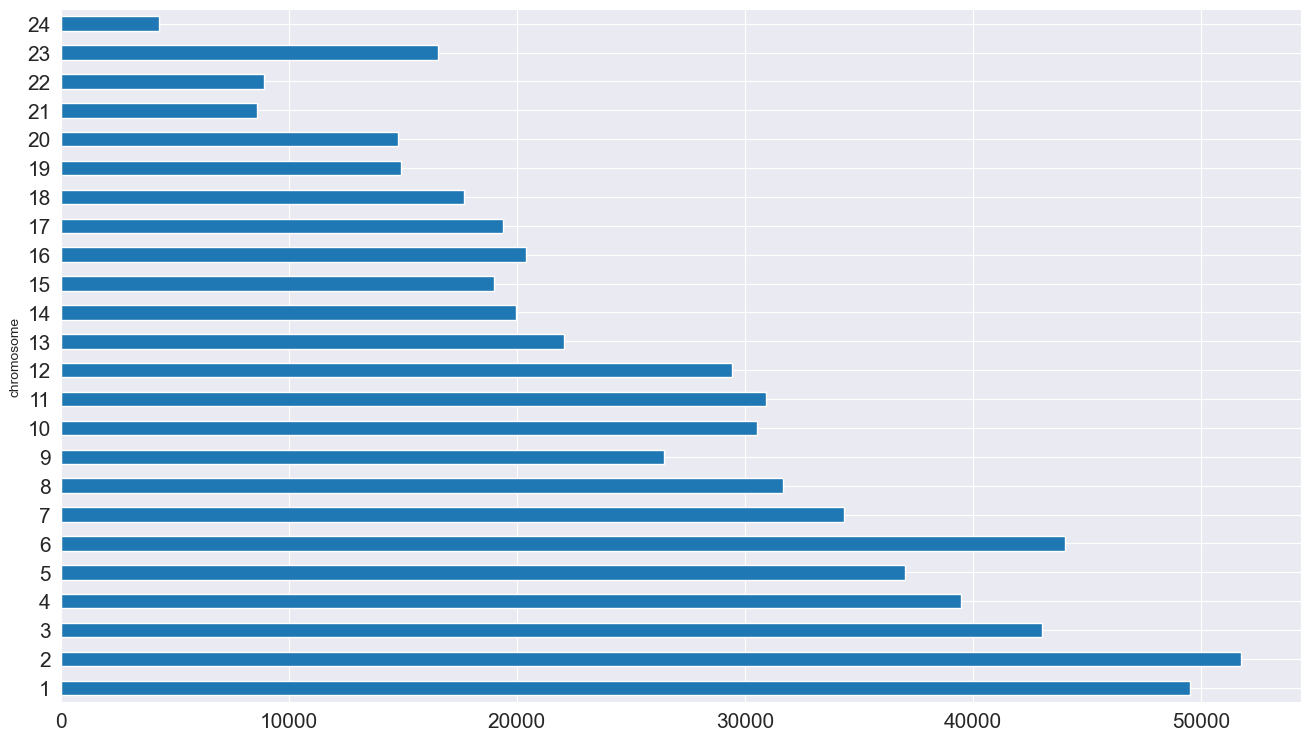

In [27]:
rsid_per_chromosome_series.plot.barh(figsize=(16,9), fontsize=15)
plt.show()

## Getting data on SNPs from SNPedia

To get some more info about my DNA, I pulled some information on clinically significant SNPs from SNPedia.

The columns are:

* Unnamed: 0 (actually the SNP name)
* Magnitude (a subjective measure of interest)
* Repute (a subjective measure of whether the genotype is "good" or "bad" to have based on research, and blank for things like ancestry and eye color)
* Summary (a narrative description)

In [28]:
snp_df = pd.read_csv('D:\\data science projects dailys\\web scraping\\web scraping\\DNA_scraping_analysis\\result.csv')
snp_df.head()

,Unnamed: 0,Magnitude,Repute,Summary
0,Rs661(A;A),9.0,Bad,early onset Alzheimer's disease
1,Rs6647(T;T),0.0,Good,Normal; two copies of Pi-M1V allele
2,Rs6647(C;C),0.0,Good,Normal; two copies of Pi-M1A allele
3,Rs1303(T;T),0.0,Good,common in clinvar
4,Rs28929471(G;G),0.0,Good,common in complete genomics


To match up with my original DataFrame, I'll create a genotype column and use regex to separate out the genotype, which is tacked onto the end of the SNP.

In [29]:
snp_df['genotype'] = snp_df['Unnamed: 0'].apply(lambda x: re.sub(r'.*([AGCT]);([AGCT])\)', r'\1\2', x))

In [30]:
snp_df.head()

,Unnamed: 0,Magnitude,Repute,Summary,genotype
0,Rs661(A;A),9.0,Bad,early onset Alzheimer's disease,AA
1,Rs6647(T;T),0.0,Good,Normal; two copies of Pi-M1V allele,TT
2,Rs6647(C;C),0.0,Good,Normal; two copies of Pi-M1A allele,CC
3,Rs1303(T;T),0.0,Good,common in clinvar,TT
4,Rs28929471(G;G),0.0,Good,common in complete genomics,GG


For consistency's sake, I renamed the columns to match my original DataFrame and made sure the rsids were all lower-case.

In [31]:
new_cols = ['rsid', 'magnitude', 'repute', 'summary', 'genotype']
snp_df.columns = new_cols

I'll use regex to clean up the rsid a little more, too.

In [32]:
snp_df['rsid'] = snp_df['rsid'].map(lambda x : x.lower())
snp_df['rsid'] = snp_df['rsid'].map(lambda x : re.sub(r'([a-z]{1,}[\d]+)\([agct];[agct]\)', r'\1', x))

In [33]:
snp_df.head()

,rsid,magnitude,repute,summary,genotype
0,rs661,9.0,Bad,early onset Alzheimer's disease,AA
1,rs6647,0.0,Good,Normal; two copies of Pi-M1V allele,TT
2,rs6647,0.0,Good,Normal; two copies of Pi-M1A allele,CC
3,rs1303,0.0,Good,common in clinvar,TT
4,rs28929471,0.0,Good,common in complete genomics,GG


In [34]:
snp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   rsid       100 non-null    object 
 1   magnitude  100 non-null    float64
 2   repute     91 non-null     object 
 3   summary    95 non-null     object 
 4   genotype   100 non-null    object 
dtypes: float64(1), object(4)
memory usage: 4.0+ KB


Let's see what's going on with the null reputes and summaries and overwrite them if it's appropriate. (In this case, the answer seems to be yes.)

In [35]:
null_repute = snp_df[snp_df['repute'].isnull()]
null_summaries = snp_df[snp_df['summary'].isnull()]
null_repute_and_summaries = pd.concat([null_repute,null_summaries]).drop_duplicates().reset_index(drop=True)
display(null_repute_and_summaries)

,rsid,magnitude,repute,summary,genotype
0,rs28931569,4.0,NaN,high risk of emphysema,CC
1,rs28929473,0.0,NaN,NaN,TT
2,rs28931572,0.0,NaN,NaN,AA
3,rs1801252,3.0,NaN,NaN,GG
4,rs8192466,4.0,NaN,uncertain,TT
5,rs4986852,2.0,NaN,predisposition to breast cancer?,AA
6,rs1800709,2.0,NaN,predisposition to breast cancer?,TT
7,rs28931592,0.0,NaN,NaN,TT
8,rs4986893,2.1,NaN,poor metabolizer of several commonly prescribe...,AA
9,rs1801252,0.0,Good,NaN,AA


In [36]:
snp_df['repute'].fillna(value='Neutral', inplace=True)
snp_df['summary'].fillna(value='None', inplace=True)

In [37]:
# No no NaNette
snp_df.isna().any()

rsid         False
magnitude    False
repute       False
summary      False
genotype     False
dtype: bool

# Merging my data with SNPedia

Here, I've done an inner join of the SNPedia DataFrame on my DNA to see what data, if any, it has on my particular genotypes.

In [38]:
new_df = snp_df.merge(df, how='inner', on=['rsid', 'genotype'], suffixes=('_SNPedia', '_myDNA'))

In [39]:
new_df.head(20)

,rsid,magnitude,repute,summary,genotype,chromosome,position
0,rs1303,0.0,Good,common in clinvar,TT,14,94844843
1,rs17580,2.5,Bad,a slightly reduced functionality form of Alpha...,TT,14,94847262
2,rs28931580,0.0,Good,common in clinvar,AA,12,50344783
3,rs1042714,0.0,Good,normal,CC,5,148206473
4,rs1800888,0.0,Good,normal,CC,5,148206885
5,rs2303790,0.0,Good,common in clinvar,AA,16,57017292
6,rs5882,2.0,Bad,Faster aging. Increased risk for Dementia. Les...,AA,16,57016092
7,rs2230199,2.0,Bad,2.5x+ risk of ARMD,GG,19,6718387
8,rs28931608,0.0,Good,common in clinvar,GG,7,75614497
9,rs4986893,0.0,Good,normal,GG,10,96540410


### What's hiding in there?

In [40]:
# Create a DataFrame for some subsets of genes
good_genes = new_df[new_df.repute == 'Good']
bad_genes = new_df[new_df.repute == 'Bad']
interesting_genes = new_df[new_df.magnitude > 4] # 4 is the threshold for "worth your time" given by SNPedia

In [41]:
good_genes

,rsid,magnitude,repute,summary,genotype,chromosome,position
0,rs1303,0.0,Good,common in clinvar,TT,14,94844843
2,rs28931580,0.0,Good,common in clinvar,AA,12,50344783
3,rs1042714,0.0,Good,normal,CC,5,148206473
4,rs1800888,0.0,Good,normal,CC,5,148206885
5,rs2303790,0.0,Good,common in clinvar,AA,16,57017292
8,rs28931608,0.0,Good,common in clinvar,GG,7,75614497
9,rs4986893,0.0,Good,normal,GG,10,96540410
10,rs28399504,0.0,Good,normal,AA,10,96522463
11,rs2234922,0.0,Good,common in clinvar,AA,1,226026406
12,rs28931614,0.0,Good,common in clinvar,GG,4,1806119


In [42]:
bad_genes

,rsid,magnitude,repute,summary,genotype,chromosome,position
1,rs17580,2.5,Bad,a slightly reduced functionality form of Alpha...,TT,14,94847262
6,rs5882,2.0,Bad,Faster aging. Increased risk for Dementia. Les...,AA,16,57016092
7,rs2230199,2.0,Bad,2.5x+ risk of ARMD,GG,19,6718387


In [43]:
interesting_genes

,rsid,magnitude,repute,summary,genotype,chromosome,position


# Scrape relevant articles with Selenium

Now I'd like to read up on my bad genetics, so I'll use Selenium to grab the abstracts of some scientific papers for me from PubMed.

In [44]:
# Get the base URL from SNPedia
base_url = 'https://www.snpedia.com/index.php/'

In [45]:
# Create URLs for each gene that I want to study
gene_urls = [base_url + rsid for rsid in bad_genes['rsid']]
for url in gene_urls:
    print(url, '\n')

https://www.snpedia.com/index.php/rs17580 

https://www.snpedia.com/index.php/rs5882 

https://www.snpedia.com/index.php/rs2230199 



In [46]:
# Initialize Selenium
browser = webdriver.Chrome()

In [47]:
import time

In [48]:
# Write a function to visit the SNPedia URLs, click through to PubMed, 
# and retrieve the info on the articles for each gene

def scrape_abstracts(urls):
    
    #all_df = pd.DataFrame()
    rsid_list = []
    all_article_links = []
    all_article_title = []
    all_article_citation = []
    all_article_authors = []
    all_article_abstract = []
    
    for url in urls:
        browser.get(url) #load url
        rsid = browser.find_element_by_css_selector('.firstHeading').text
        links_elements = browser.find_elements_by_partial_link_text('PMID')
        link_urls = []
        
        for link in links_elements:
            link_urls.append(link.get_attribute('href')) # get the URLs to the PubMed pages
    
        for element in link_urls:
            browser.get(element) # follow each link element to PubMed
            time.sleep(.8)
            article_title = browser.find_element_by_xpath("//div[@class='cit']/../h1").text
            article_citation = browser.find_element_by_class_name('cit').text
            article_authors = browser.find_element_by_class_name('auths').text
            article_abstract = browser.find_element_by_class_name('abstr').text

            rsid_list.append(rsid)
            all_article_title.append(article_title)
            all_article_citation.append(article_citation)
            all_article_authors.append(article_authors)
            all_article_abstract.append(article_abstract)
            all_article_links.append(element)
            
        print(len(rsid_list) == len(link_urls) == len(all_article_title) == len(all_article_citation) == len(all_article_authors) == len(all_article_abstract))
     
    df = pd.DataFrame() # store the information
    df['rsid'] = rsid_list
    df['article_title'] = all_article_title
    df['article_citation'] = all_article_citation
    df['article_authors'] = all_article_authors
    df['article_abstract'] = all_article_abstract
    df['link'] = all_article_links
    df = df.drop_duplicates()

    df.index = range(len(df.index))
    
    return df

In [52]:
abstracts_df = scrape_abstracts(gene_urls)

True
False
False


In [55]:
abstracts_df

,rsid,article_title,article_citation,article_authors,article_abstract,link
0,rs17580,Heterozygosity for the alpha1-antitrypsin Z al...,Aliment Pharmacol Ther. 2011 Feb;33(3):389-94....,"Mihalache F1, Höblinger A, Grünhage F, Krawczy...",Abstract\nBACKGROUND:\nAlpha1-antitrypsin (α1A...,https://www.ncbi.nlm.nih.gov/pubmed/21138453?d...
1,rs17580,Genetic polymorphisms and susceptibility to lu...,J Negat Results Biomed. 2006 Apr 11;5:5.,"Lee PL1, West C, Crain K, Wang L.",Abstract\nSusceptibility to infection by bacte...,https://www.ncbi.nlm.nih.gov/pubmed/16608528?d...
2,rs17580,Prevalence of genetic polymorphisms in the pro...,BMC Gastroenterol. 2010 Feb 20;10:22. doi: 10....,"Kok KF1, te Morsche RH, van Oijen MG, Drenth JP.",Abstract\nBACKGROUND:\nAlpha-1 antitrypsin (A1...,https://www.ncbi.nlm.nih.gov/pubmed/20170533?d...
3,rs17580,Serum levels and genotype distribution of α1-a...,Thorax. 2012 Aug;67(8):669-74. doi: 10.1136/th...,"Ferrarotti I1, Thun GA, Zorzetto M, Ottaviani ...",Abstract\nRATIONALE:\nα1-Antitrypsin (AAT) def...,https://www.ncbi.nlm.nih.gov/pubmed/22426792?d...
4,rs17580,Molecular abnormality of PI S variant of human...,Am J Hum Genet. 1977 May;29(3):233-9.,"Yoshida A, Ewing C, Wessels M, Lieberman J, Ga...",Abstract\nAlpha1-antitrypsin variant protein w...,https://www.ncbi.nlm.nih.gov/pubmed/301355?dop...
5,rs17580,Alpha 1-antitrypsin deficiency caused by the a...,J Clin Invest. 1989 Apr;83(4):1144-52.,"Curiel D1, Brantly M, Curiel E, Stier L, Cryst...",Abstract\nalpha 1-Antitrypsin (alpha 1AT) defi...,https://www.ncbi.nlm.nih.gov/pubmed/2539391?do...
6,rs17580,SERPINA1 PiZ and PiS heterozygotes and lung fu...,PLoS One. 2012;7(8):e42728. doi: 10.1371/journ...,"Thun GA1, Ferrarotti I, Imboden M, Rochat T, G...",Abstract\nBACKGROUND:\nSevere alpha1-antitryps...,https://www.ncbi.nlm.nih.gov/pubmed/22912729?d...
7,rs17580,Prevalence of alpha-1 antitrypsin high-risk va...,Arch Bronconeumol. 2015 Feb;51(2):80-85. doi: ...,"Pérez-Rubio G1, Jiménez-Valverde LO2, Ramírez-...",Abstract\nINTRODUCTION:\nChronic obstructive p...,https://www.ncbi.nlm.nih.gov/pubmed/25454901?d...
8,rs5882,Association of a functional polymorphism in th...,JAMA. 2010 Jan 13;303(2):150-8. doi: 10.1001/j...,"Sanders AE1, Wang C, Katz M, Derby CA, Barzila...",Abstract\nCONTEXT:\nPolymorphisms in the chole...,https://www.ncbi.nlm.nih.gov/pubmed/20068209?d...
9,rs5882,Common genetic variation in multiple metabolic...,J Lipid Res. 2010 Dec;51(12):3524-32. doi: 10....,"Peloso GM1, Demissie S, Collins D, Mirel DB, G...",Abstract\nA low level of HDL-C is the most com...,https://www.ncbi.nlm.nih.gov/pubmed/20855565?d...


In [56]:
#DataFrame to CSV
export_csv = abstracts_df.to_csv('D:/data science projects dailys/web scraping/web scraping/DNA_scraping_analysis/DNA_articles.csv')

## Reading up on the medical literature

Now I have a handy CSV file, nicely formatted to read in Numbers, Excel, or PDF format, with citations to scientific articles analyzing and describing my genotypes with "significant" magnitudes and "bad" reputations. With the powerful tools Python provides, it's a great time to be alive for literal introspection. 